In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import math
import numpy as np
from ipywidgets import widgets
from IPython.display import display

In [2]:
# I am using the following code to compute n choose k. The code 
# is copied from https://stackoverflow.com/questions/3025162/statistics-combinations-in-python.

def choose(n, k):
    if 0 <= k <= n:
        ntok = 1
        ktok = 1
        for t in xrange(1, min(k, n - k) + 1):
            ntok *= n
            ktok *= t
            n -= 1
        return ntok // ktok
    else:
        return 0

### Normal distribution

The normal distribution is a symmetric unimodal Bell-shaped distribution which is described by two parameters: the mean and the standard distribution. The mean indicates the shift on the x axis, whereas the standard distribution determines the width of the central part of the distribution. 

<IPython.core.display.Javascript object>


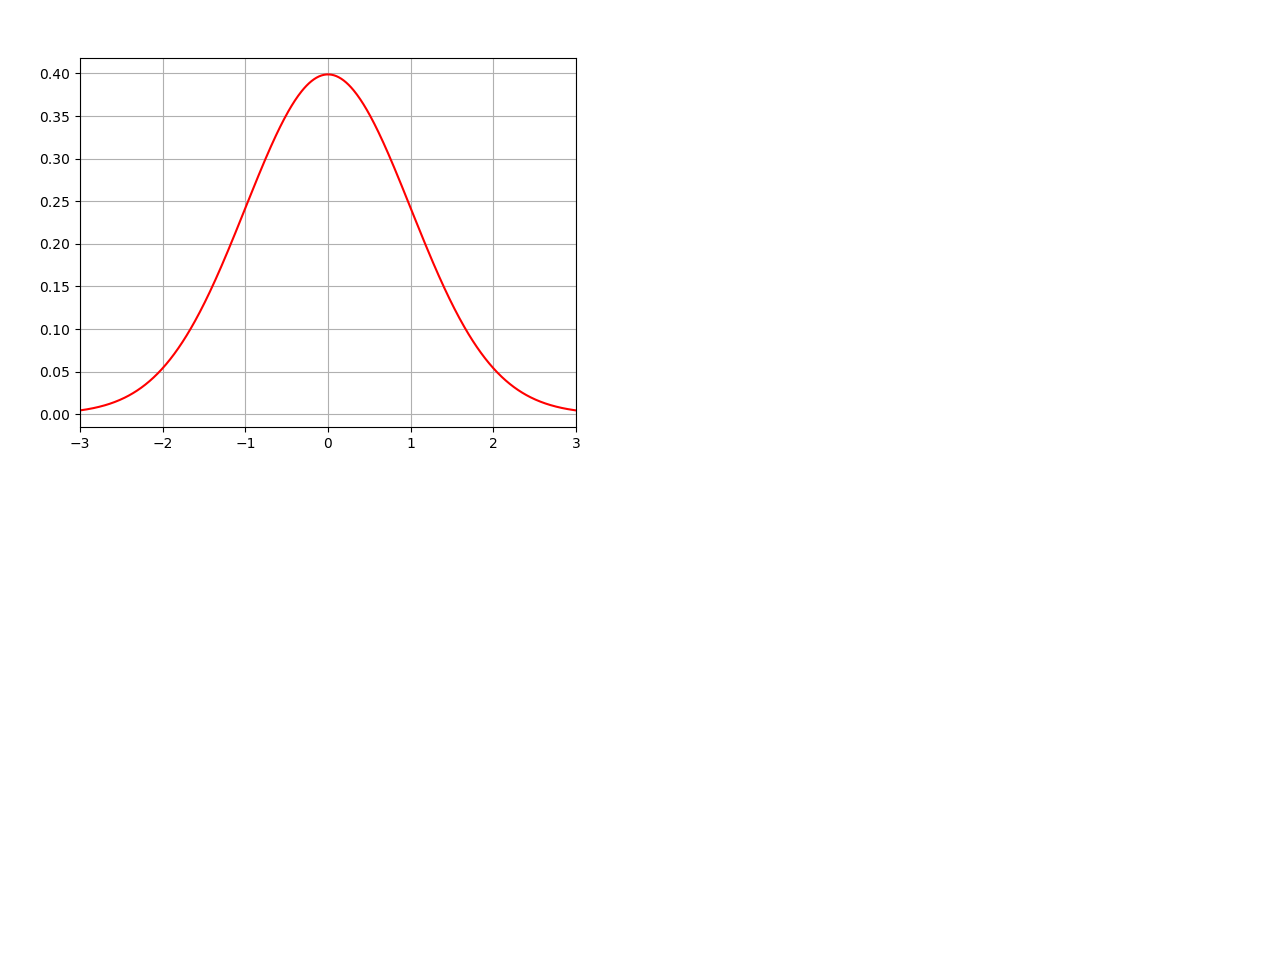

Widget Javascript not detected.  It may not be installed or enabled properly.


AttributeError: 'Button' object has no attribute 'value'

In [3]:
fig_normal, ax = plt.subplots()
ax.grid(True)
plt.ion()
COLORS = ['red', 'blue', 'green']
DEFAULT_STD = 1

def define_input(description, value):
    return widgets.FloatText(
        value=value,
        description=description,
    )

w = list()

number_dist = widgets.Dropdown(
    options=['1', '2', '3'],
    value='1',
    description='Number of distributions:',
)

mean1 = define_input('Mean 1: ', 0)
mean2 = define_input('Mean 2: ', -1)
mean3 = define_input('Mean 3: ', 1)
std1 = define_input('Standard deviation 1: ', DEFAULT_STD)
std2 = define_input('Standard deviation 2: ', DEFAULT_STD)
std3 = define_input('Standard deviation 3: ', DEFAULT_STD)

layout = widgets.VBox([
    number_dist,
    widgets.HBox([mean1, std1]),
    widgets.HBox([mean2, std2]),
    widgets.HBox([mean3, std3])
])

# The normal distributions are plot in the range between -3 standard deviations and
# 3 standard deviations. However, if more than one distribution is plot, we extrapolate
# the tails of all of them so they cover all the x axis
def on_change(change):
    global fig_normal, ax, lines
    
    # Deleting previous figure
    while len(ax.lines) > 0:
        l = ax.lines.pop(0)
        del l
        
    # Checking that the standard deviation is higher than 0
    for i in range(int(number_dist.value)):
        if wid[4+i].value <= 0:
            wid[4+i].value = DEFAULT_STD
        
    # Computing the range of x values
    min_x = wid[1].value - 3*wid[4].value
    max_x = wid[1].value + 3*wid[4].value
    for i in range(1,int(number_dist.value)):
        min_x = min(min_x, wid[i+1].value - 3*wid[4+i].value)
        max_x = max(max_x, wid[i+1].value + 3*wid[4+i].value)
        
    # Plotting itself
    for i in range(int(number_dist.value)):
        # Manually computing the normal distribution's PDF
        mean = float(wid[1+i].value)
        std = float(wid[4+i].value)
        x = np.arange(min_x, max_x, 0.01)
        y = 1/(math.sqrt(2*math.pi*std**2))*np.exp(-(x-mean)**2/(2*std**2))
        ax.plot(x,y,color=COLORS[i])
    ax.set_xlim([min_x, max_x])
    fig_normal.canvas.draw()
    
wid = [number_dist, mean1, mean2, mean3, std1, std2, std3]
[w.observe(on_change) for w in wid]
on_change(None)

display(layout)

### Bernoulli distribution

A Bernoulli random variable is a random variable with only two possible values corresponding to the two possible outcomes of a trial: success and fail. If the probability of obtaining a success is p, then we can say that the random variable is following a Bernoulli distribution with mean p and standard deviation √(p(1-p)).

<IPython.core.display.Javascript object>


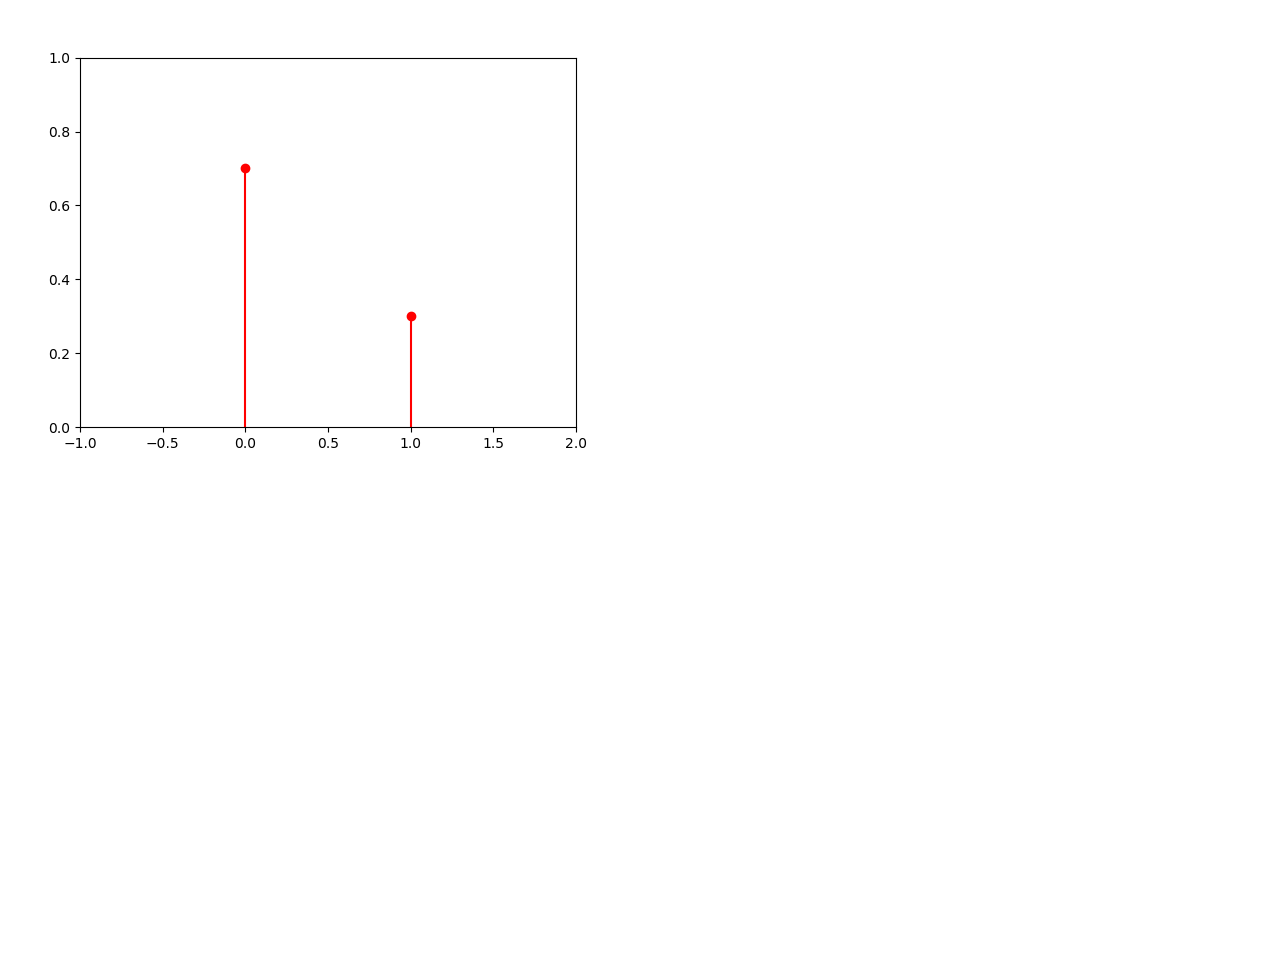

Widget Javascript not detected.  It may not be installed or enabled properly.


In [4]:
fig_ber, ax = plt.subplots()
plt.ion()
COLORS = ['r', 'b', 'g']
MARKERS = ['o', 's', '*']
BUTTON_DESCRIPTION = 'mean = %.2f, standard deviaton = %.2f'
P = [0.3, 0.5, 0.7]

def define_input(description, value):
    return widgets.FloatText(
        value=value,
        min=0,
        max=1,
        description=description
    )

def define_label(i):
    return widgets.Button(
    description = BUTTON_DESCRIPTION%( 
        P[i], 
        math.sqrt(P[i]*(1-P[i]))
    ),
    layout = widgets.Layout(width='50%'),
    disabled = True)

w = list()

number_dist = widgets.Dropdown(
    options=['1', '2', '3'],
    value='1',
    description='Number of distributions:',
)

p1 = define_input('p1: ', P[0])
p2 = define_input('p2: ', P[1])
p3 = define_input('p3: ', P[2])

b1 = define_label(0)
b2 = define_label(1)
b3 = define_label(2)

layout = widgets.VBox([number_dist, p1, b1, p2, b2, p3, b3])

# This is just a suggestion on how to represent a bernoulli distribution, 
# even thought it really does not make much sense to represent such a
# distribution with a plot, in my opinion
def on_change(change):
    global fig_ber, ax, lines
    
    # Deleting previous figure
    while len(ax.lines) > 0:
        l = ax.lines.pop(0)
        del l
        
    # Updating information
    for i in range(3):
        wid[4+i].description = BUTTON_DESCRIPTION%( 
            wid[i+1].value, 
            math.sqrt(wid[i+1].value*(1-wid[i+1].value))
        )
        
    # Plotting itself
    for i in range(int(number_dist.value)):
        x = [0, 1]
        y = [1 - wid[i+1].value, wid[i+1].value]
        (markerline, stemlines, baseline) = ax.stem(
                x,y, 
                baseline='', 
                linefmt=COLORS[i], 
                markerfmt=COLORS[i] + MARKERS[i])
        plt.setp(baseline, visible=False)
        
    ax.set_xlim([-1, 2])
    ax.set_ylim([0,1])
    fig_ber.canvas.draw()
    
wid = [number_dist, p1, p2, p3, b1, b2, b3]
[w.observe(on_change) for w in wid]
on_change(None)

display(layout)

### Geometric distribution

A Geometric distribution describes the waiting time required to obtain the first success in a series of independent and identically distributed Bernoulli trials.  

The mean of a geometric distribution is 1/p and the standard deviation is √((1-p)/p**2)

<IPython.core.display.Javascript object>


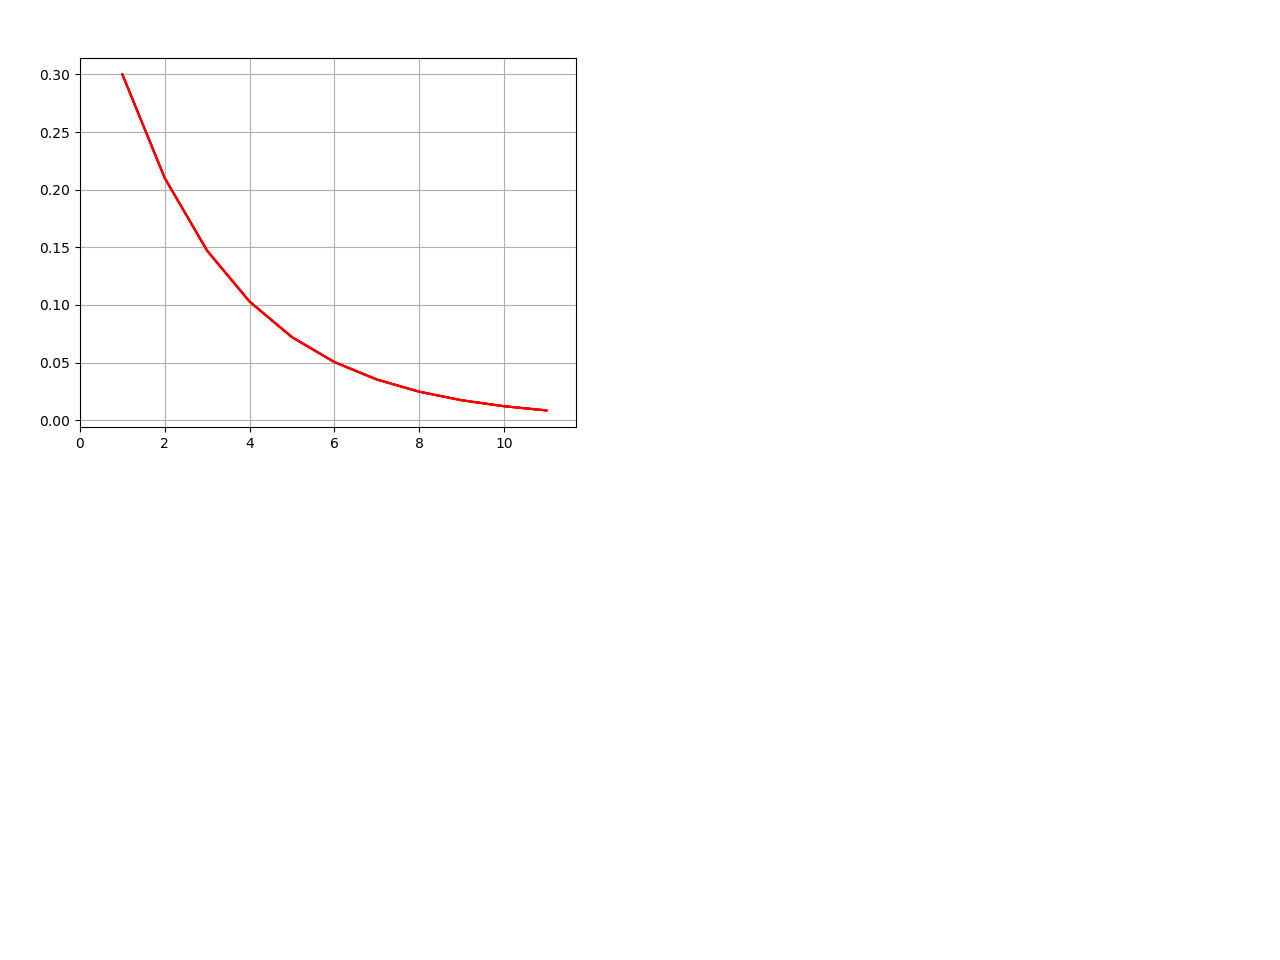

Widget Javascript not detected.  It may not be installed or enabled properly.


ValueError: math domain error

In [5]:
fig_geo, ax = plt.subplots()
ax.grid(True)
plt.ion()
COLORS = ['r', 'b', 'g']
BUTTON_DESCRIPTION = 'mean = %.2f, standard deviaton = %.2f'
P = [0.3, 0.5, 0.7] # Also used if any probability is set to zero
                    # We cannot set p=0 for this distribution

w = list()

number_dist = widgets.Dropdown(
    options=['1', '2', '3'],
    value='1',
    description='Number of distributions:',
)

p1 = define_input('p1: ', P[0])
p2 = define_input('p2: ', P[1])
p3 = define_input('p3: ', P[2])

b1 = define_label(0)
b2 = define_label(1)
b3 = define_label(2)

layout = widgets.VBox([number_dist, p1, b1, p2, b2, p3, b3])

# The x-range of the plot is set between 0 and the mean + 
# 3 standard deviations of the distribution. If more than one distribution
# is displayed, we used the maximum range
def on_change(change):
    global fig_geo, ax, lines
    
    # Deleting previous figure
    while len(ax.lines) > 0:
        l = ax.lines.pop(0)
        del l
        
    # Updating labels and computing the range
    max_x = 0
    for i in range(3):
        if wid[i+1].value == 0:
            wid[i+1].value = P[i]
        
        mean = 1/wid[i+1].value
        std = math.sqrt((1-wid[i+1].value)/wid[i+1].value**2)
        
        wid[4+i].description = BUTTON_DESCRIPTION%( 
            mean, 
            std
        )
          
        if i < int(number_dist.value):
            max_x = max(max_x, mean + 3*std)

    # Plotting itself
    for i in range(int(number_dist.value)):
        p = wid[i+1].value
        x = np.arange(1, max_x)
        y = p*(1-p)**(x-1)
        ax.plot(x,y,color=COLORS[i])
        
    ax.set_xlim([0, max_x])
    fig_geo.canvas.draw()
    
wid = [number_dist, p1, p2, p3, b1, b2, b3]
[w.observe(on_change) for w in wid]
on_change(None)

display(layout)

### Binomial distribution

The binomial distribution describes the probability of obtaining exactly k successes out of n independent and identically distributed Bernoulli tests with a probability p of success.

The mean of the binomial distribution is np and the standard deviation is √(np(1-p))

<IPython.core.display.Javascript object>


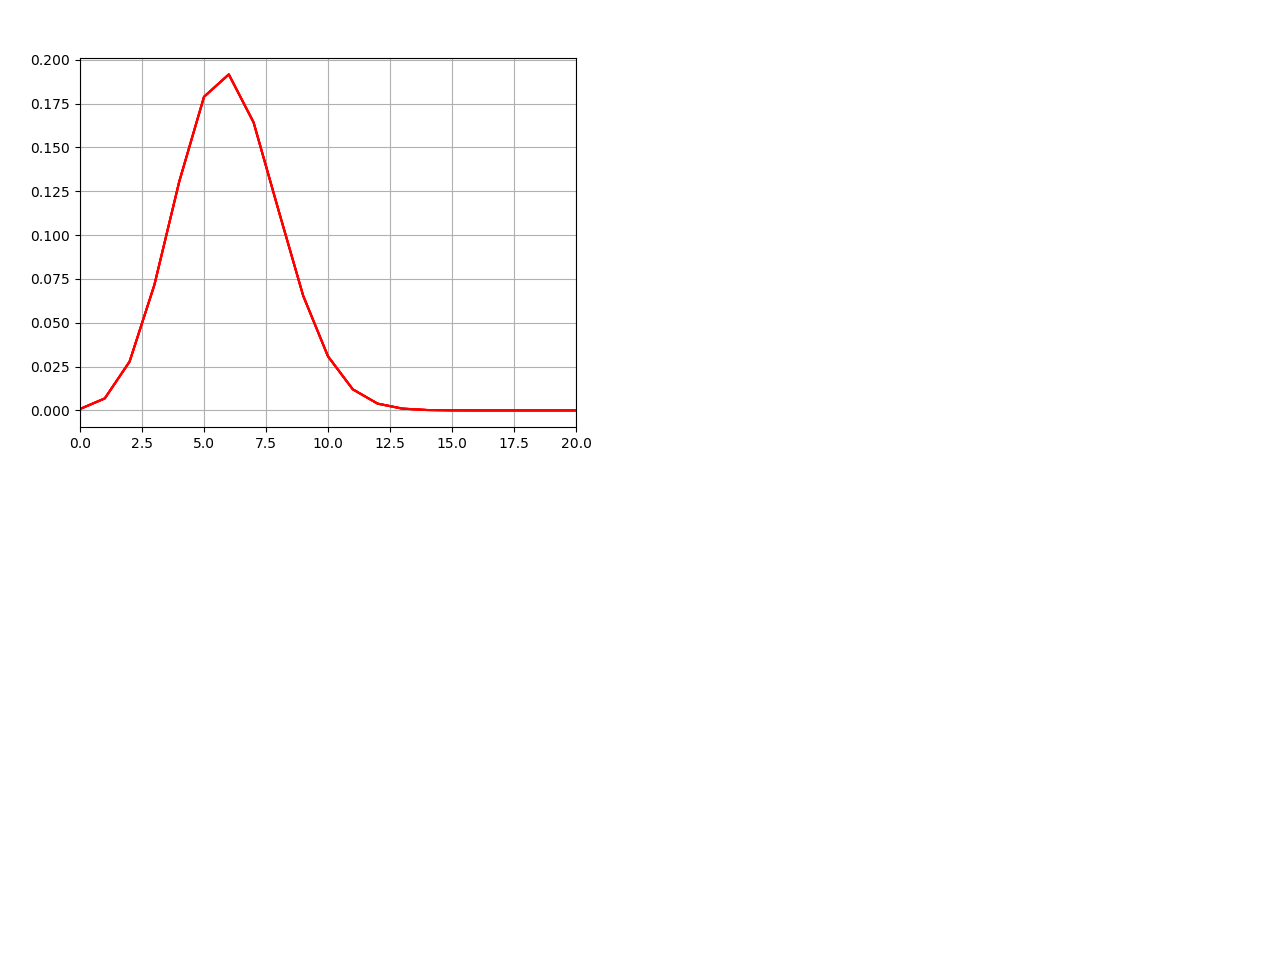

Widget Javascript not detected.  It may not be installed or enabled properly.


In [6]:
fig_bin, ax = plt.subplots()
ax.grid(True)
plt.ion()
COLORS = ['r', 'b', 'g']
BUTTON_DESCRIPTION = 'mean = %.2f, standard deviaton = %.2f'
P = [0.3, 0.5, 0.7] # Also used if any probability is set to zero
                    # We cannot set p=0 for this distribution
N = [20, 20, 20]

w = list()

number_dist = widgets.Dropdown(
    options=['1', '2', '3'],
    value='1',
    description='Number of distributions:',
)

def define_input_prob(description, value):
    return widgets.FloatText(
        value=value,
        min=0,
        max=1,
        description=description
    )

def define_input_natural(description, value):
    return widgets.IntText(
        value=value,
        min=0,
        description=description
    )

p1 = define_input_prob('p1: ', P[0])
p2 = define_input_prob('p2: ', P[1])
p3 = define_input_prob('p3: ', P[2])

n1 = define_input_natural('n1: ', N[0])
n2 = define_input_natural('n2: ', N[1])
n3 = define_input_natural('n3: ', N[2])

b1 = define_label(0)
b2 = define_label(1)
b3 = define_label(2)

layout = widgets.VBox([
            number_dist, 
            widgets.HBox([n1, p1]), 
            b1, 
            widgets.HBox([n2, p2]),
            b2, 
            widgets.HBox([n3, p3]),
            b3
])

# The x-range of the plot is set between 0 and the maximum value of n for
# the selected distributions
def on_change(change):
    global fig_bin, ax, lines
    
    # Deleting previous figure
    while len(ax.lines) > 0:
        l = ax.lines.pop(0)
        del l
        
    # Validating input and computing the range
    max_x = 0
    for i in range(int(number_dist.value)):
        # n
        if wid[4+i].value == 0:
            wid[4+i].value = N[i]
        # p
        if wid[i+1].value == 0:
            wid[i+1].value = P[i]
            
        max_x = max(max_x, int(wid[4+i].value))
        
    # Updating labels 
    for i in range(3): 
        mean = float(wid[4+i].value * wid[i+1].value)
        std = float(math.sqrt((1-wid[i+1].value)*wid[i+1].value*wid[4+i].value))
        
        wid[7+i].description = BUTTON_DESCRIPTION%( 
            mean, 
            std
        )

    # Plotting itself
    for i in range(int(number_dist.value)):
        p = wid[i+1].value
        n = wid[i+4].value
        x = np.arange(0, max_x+1)
        y = map(lambda k: choose(int(n), int(k))*p**k*(1-p)**(n-k), x)
        ax.plot(x,y,color=COLORS[i])
        
    ax.set_xlim([0, max_x])
    fig_bin.canvas.draw()
    
wid = [number_dist, p1, p2, p3, n1, n2, n3, b1, b2, b3]
[w.observe(on_change) for w in wid]
on_change(None)

display(layout)

### Negative binomial distribution

The negative binomial distribution is a generalisation of the geometric distribution that expresses the probability of obtaining the k-th success after the n-th trial, so that the result of the last trial is a success. The mean and the standard deviation are k/p and sqrt(k*(1-p)/p^2), respectively.

<IPython.core.display.Javascript object>


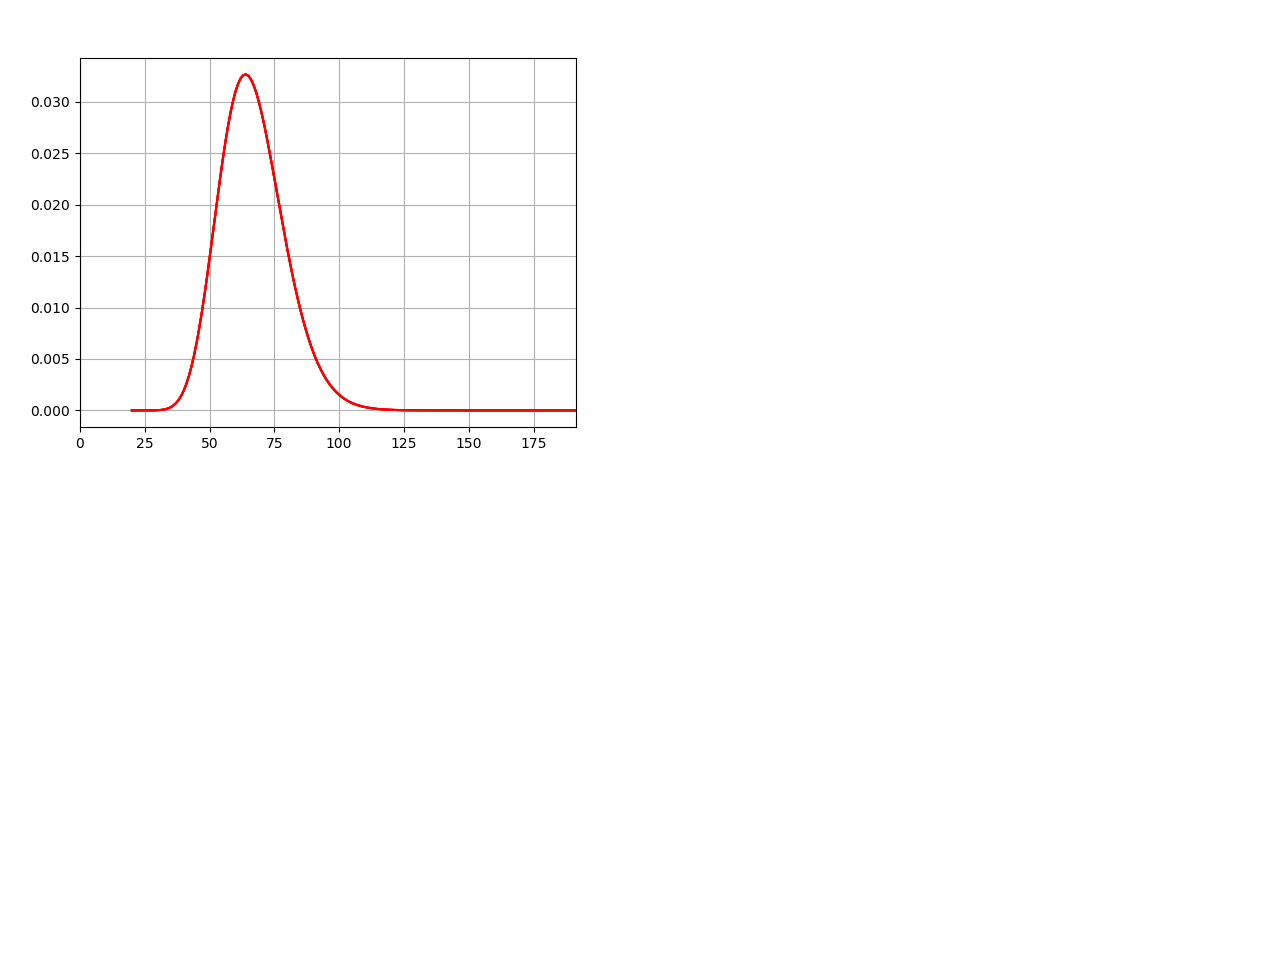

Widget Javascript not detected.  It may not be installed or enabled properly.


In [7]:
fig_nbin, ax = plt.subplots()
ax.grid(True)
plt.ion()
COLORS = ['r', 'b', 'g']
BUTTON_DESCRIPTION = 'mean = %.2f, standard deviaton = %.2f'
P = [0.3, 0.5, 0.7] # Also used if any probability is set to zero
                    # We cannot set p=0 for this distribution
K = [20, 20, 20]

w = list()

number_dist = widgets.Dropdown(
    options=['1', '2', '3'],
    value='1',
    description='Number of distributions:',
)


p1 = define_input_prob('p1: ', P[0])
p2 = define_input_prob('p2: ', P[1])
p3 = define_input_prob('p3: ', P[2])

k1 = define_input_natural('k1: ', K[0])
k2 = define_input_natural('k2: ', K[1])
k3 = define_input_natural('k3: ', K[2])

b1 = define_label(0)
b2 = define_label(1)
b3 = define_label(2)

layout = widgets.VBox([
            number_dist, 
            widgets.HBox([k1, p1]), 
            b1, 
            widgets.HBox([k2, p2]),
            b2, 
            widgets.HBox([k3, p3]),
            b3
])

# The x-range of the plot is set between 0 and the maximum value of n for
# the selected distributions
def on_change(change):
    global fig_nbin, ax, lines
    
    # Deleting previous figure
    while len(ax.lines) > 0:
        l = ax.lines.pop(0)
        del l
        
    # Validating input and computing the range
    for i in range(int(number_dist.value)):
        # k
        if wid[4+i].value == 0:
            wid[4+i].value = K[i]
        # p
        if wid[i+1].value == 0:
            wid[i+1].value = P[i]
        
    # Updating labels 
    max_x = 0
    for i in range(3): 
        mean = float(wid[4+i].value / wid[i+1].value)
        std = float(math.sqrt((1-wid[i+1].value)*wid[4+i].value)/(wid[i+1].value**2))
        
        wid[7+i].description = BUTTON_DESCRIPTION%( 
            mean, 
            std
        )
        
        if i < int(number_dist.value):
            max_x = max(max_x, mean + 3*std)

    # Plotting itself
    for i in range(int(number_dist.value)):
        p = wid[i+1].value
        k = wid[i+4].value
        x = np.arange(k, max_x+1)
        y = map(lambda n: choose(int(n-1), int(k-1))*p**k*(1-p)**(n-k), x)
        ax.plot(x,y,color=COLORS[i])
        
    ax.set_xlim([0, max_x])
    fig_nbin.canvas.draw()
    
wid = [number_dist, p1, p2, p3, k1, k2, k3, b1, b2, b3]
[w.observe(on_change) for w in wid]
on_change(None)

display(layout)

### Poisson distribution

The Poisson distribution expresses the probability of k events to occur in a fixed time interval when these events occur an average of l (lambda) times in such period of time independently of the time since the last event. The mean and standard deviation of the Poisson distribution are l and sqrt(l), respectively.

<IPython.core.display.Javascript object>


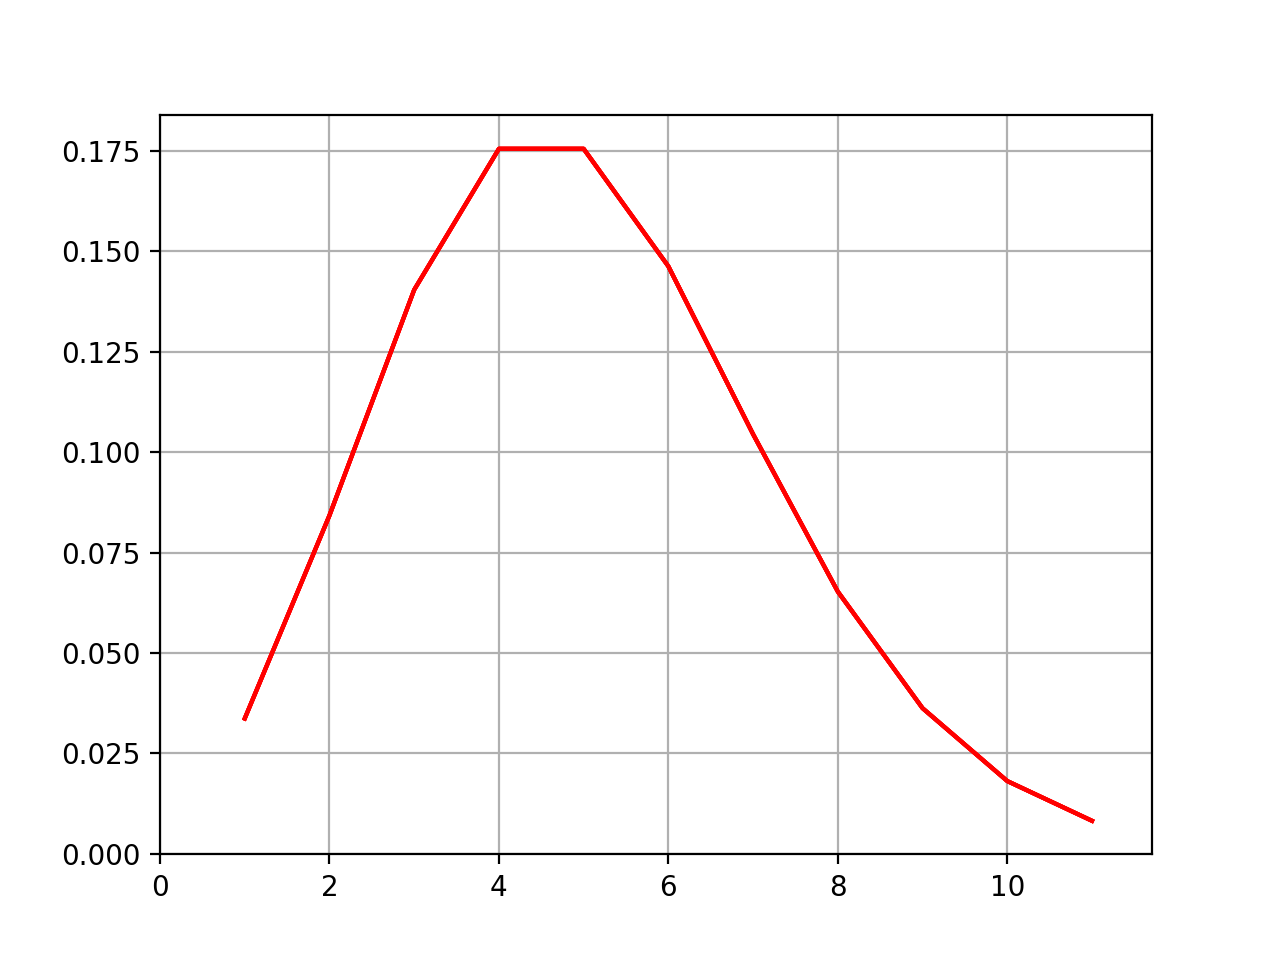

Widget Javascript not detected.  It may not be installed or enabled properly.


In [9]:
from scipy.misc import factorial

fig_poi, ax = plt.subplots()
ax.grid(True)
plt.ion()
COLORS = ['r', 'b', 'g']
BUTTON_DESCRIPTION = 'mean = %.2f, standard deviaton = %.2f'
L = [5, 10, 15] 

w = list()

number_dist = widgets.Dropdown(
    options=['1', '2', '3'],
    value='1',
    description='Number of distributions:',
)

l1 = define_input_natural('lambda1: ', L[0])
l2 = define_input_natural('lambda2: ', L[1])
l3 = define_input_natural('lambda3: ', L[2])

b1 = define_label(0)
b2 = define_label(1)
b3 = define_label(2)

layout = widgets.VBox([number_dist, l1, b1, l2, b2, l3, b3])

# The x-range of the plot is set between 0 and the mean + 
# 3 standard deviations of the distribution. If more than one distribution
# is displayed, we used the maximum range
def on_change(change):
    global fig_poi, ax, lines
    
    # Deleting previous figure
    while len(ax.lines) > 0:
        l = ax.lines.pop(0)
        del l
        
    # Updating labels and computing the range
    max_x = 0
    for i in range(3):
        if wid[i+1].value == 0:
            wid[i+1].value = L[i]
        
        mean = wid[i+1].value
        std = math.sqrt(wid[i+1].value)
        
        wid[4+i].description = BUTTON_DESCRIPTION%( 
            mean, 
            std
        )
          
        if i < int(number_dist.value):
            max_x = max(max_x, mean + 3*std)

    # Plotting itself
    for i in range(int(number_dist.value)):
        l = wid[i+1].value
        x = np.arange(1, max_x)
        y = l**x*math.exp(-l)/factorial(x)
        ax.plot(x,y,color=COLORS[i])
        
    ax.set_xlim([0, max_x])
    fig_poi.canvas.draw()
    
wid = [number_dist, l1, l2, l3, b1, b2, b3]
[w.observe(on_change) for w in wid]
on_change(None)

display(layout)